# Melbourne Housing Market

https://www.kaggle.com/anthonypino/melbourne-housing-market#Melbourne_housing_FULL.csv

Melbourne Housing Dataset 

# Data Dictionary

| Variable      |                                 Definition | Key                                            |
|---------------|-------------------------------------------:|------------------------------------------------|
| Suburb        | Suburb                                     |                            |
| Address       | Address                                    |                    |
| Rooms         | Number of rooms                                        |                                                |
| Price         | Price in Australian dollars                              |                                                |
| Method        |  S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available. |                                                |
| Type          | br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.                                               |
| SellerG       | Real Estate Agent                            |                                                |
| Date          | Date sold                         |                                                |
| Distance      | Distance from CBD in Kilometres                               |                                                |
| Regionname    | General Region (West, North West, North, North east ...etc)                       | |
| Propertycount | Number of properties that exist in the suburb.                         |                                                |
| Bedroom2      | DScraped # of Bedrooms (from different source)                               |                                                |
| Bathroom      | Number of Bathrooms 
| Car           | Number of carspots                       |                                                |
| Landsize      |  Land Size in Metres                             |                                                |
| BuildingArea  | Building Size in Metres
| YearBuilt     | Year the house was built 
| CouncilArea   | Governing council for the area                       |                                                |
| Lattitude     |  Self explanitory                             |                                                |
| Longtitude    | Self explanitory


------------------------------------------------------------------------------------------

Which Type of Property in Melbourne? (house/ unit/ townhouse)

Number of bedrooms in the majority of houses                                         

Which part of Melbourne has more property sold?                                      

Which suburb has more property price?

which is the Costly Suburb?

The relationship between Distance/Bedrooms/Car Vs Price?

------------------------------------------------------------------------------------------

In [1]:
# Import Libraries

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


### Import the Dataset

In [2]:
# Read CSV
#house = pd.read_csv('Melbourne_housing_FULL.csv')
path  = 'Melbourne_housing_FULL.csv'
#path  = 'MELBOURNE_HOUSE_PRICES_LESS.csv'

def loadCSV(path):
    return pd.read_csv(path)

def getHead(df, size=5):
    return df.head(size)



In [3]:
house = loadCSV(path)

In [4]:
#getHead(house)

In [5]:
#convert column name to lowercase 
def clean_column_name(column_names):
    clean_column_names = []
    for c in column_names:
        c = c.lower().replace(' ', '_')
        c = c.lower().replace('*', '')
        c = c.lower().replace('?', '')
        clean_column_names.append(c)

    return clean_column_names


house.columns = clean_column_name(house.columns)

In [6]:
getHead(house)

,suburb,address,rooms,type,price,method,sellerg,date,distance,postcode,...,bathroom,car,landsize,buildingarea,yearbuilt,councilarea,lattitude,longtitude,regionname,propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


### Data preprocessing / Cleaning (Missing Values)

In [7]:
house.loc[:,['rooms','price','bedroom2']].sample(10)

,rooms,price,bedroom2
6271,3,1437000.0,2.0
11283,3,NaN,3.0
22278,2,495000.0,2.0
25702,2,841000.0,2.0
26548,4,1500000.0,4.0
17151,3,1160000.0,3.0
16400,3,1210000.0,NaN
18476,4,NaN,4.0
5445,1,405000.0,1.0
34120,4,1125000.0,NaN


The differences between rooms and bedroom2 variables are minimal so keeping both would only be duplicating information.Both variables are highly correlated.Therefore the Bedroom2 feature will be removed from the data set.

`yearbuilt` column contains too many Nan values 

In [8]:
house = house.drop(['bedroom2'],axis=1)
house = house.drop(['yearbuilt'],axis=1)

In [9]:
house.shape

(34857, 19)

In [10]:
house.columns

Index(['suburb', 'address', 'rooms', 'type', 'price', 'method', 'sellerg',
       'date', 'distance', 'postcode', 'bathroom', 'car', 'landsize',
       'buildingarea', 'councilarea', 'lattitude', 'longtitude', 'regionname',
       'propertycount'],
      dtype='object')

In [11]:

#house.isnull().any()
house.isnull().sum()

suburb               0
address              0
rooms                0
type                 0
price             7610
method               0
sellerg              0
date                 0
distance             1
postcode             1
bathroom          8226
car               8728
landsize         11810
buildingarea     21115
councilarea          3
lattitude         7976
longtitude        7976
regionname           3
propertycount        3
dtype: int64

**`price` column has 7610 Null Values**

In [12]:
house[house['price'].isnull()]


,suburb,address,rooms,type,price,method,sellerg,date,distance,postcode,bathroom,car,landsize,buildingarea,councilarea,lattitude,longtitude,regionname,propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,1.0,1.0,126.0,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,2.0,1.0,0.0,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,2.0,2.0,400.0,220.0,Yarra City Council,-37.79650,144.99650,Northern Metropolitan,4019.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,6/08/2016,2.5,3067.0,1.0,2.0,201.0,NaN,Yarra City Council,-37.79950,144.99740,Northern Metropolitan,4019.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,6/08/2016,2.5,3067.0,2.0,1.0,202.0,NaN,Yarra City Council,-37.79960,144.99890,Northern Metropolitan,4019.0
12,Abbotsford,121/56 Nicholson St,2,u,NaN,PI,Biggin,7/11/2016,2.5,3067.0,2.0,1.0,4292.0,82.0,Yarra City Council,-37.80780,144.99650,Northern Metropolitan,4019.0
13,Abbotsford,17 Raphael St,4,h,NaN,W,Biggin,7/11/2016,2.5,3067.0,2.0,0.0,230.0,147.0,Yarra City Council,-37.80660,144.99360,Northern Metropolitan,4019.0
20,Abbotsford,2 Rich St,2,h,NaN,SP,Biggin,10/12/2016,2.5,3067.0,1.0,1.0,176.0,80.0,Yarra City Council,-37.79980,144.99720,Northern Metropolitan,4019.0
31,Abbotsford,16/11 Nicholson St,3,u,NaN,PI,Philip,16/04/2016,2.5,3067.0,2.0,2.0,0.0,129.0,Yarra City Council,-37.80930,144.99590,Northern Metropolitan,4019.0
34,Abbotsford,16b Mollison St,2,h,NaN,PI,Biggin,16/07/2016,2.5,3067.0,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0


In [13]:
house.dtypes


suburb            object
address           object
rooms              int64
type              object
price            float64
method            object
sellerg           object
date              object
distance         float64
postcode         float64
bathroom         float64
car              float64
landsize         float64
buildingarea     float64
councilarea       object
lattitude        float64
longtitude       float64
regionname        object
propertycount    float64
dtype: object

In [14]:
# Convert objects to categorical variables
#obj_cats = ['suburb', 'address',  'method', 'sellerg', 'councilarea','regionname']
obj_cats = house.select_dtypes(['object']).columns

for column_name in obj_cats:
    house[column_name] = house[column_name].astype('category') 

# Convert 'postcode' to categorical variables
house['postcode'] = house['postcode'].astype('category') 


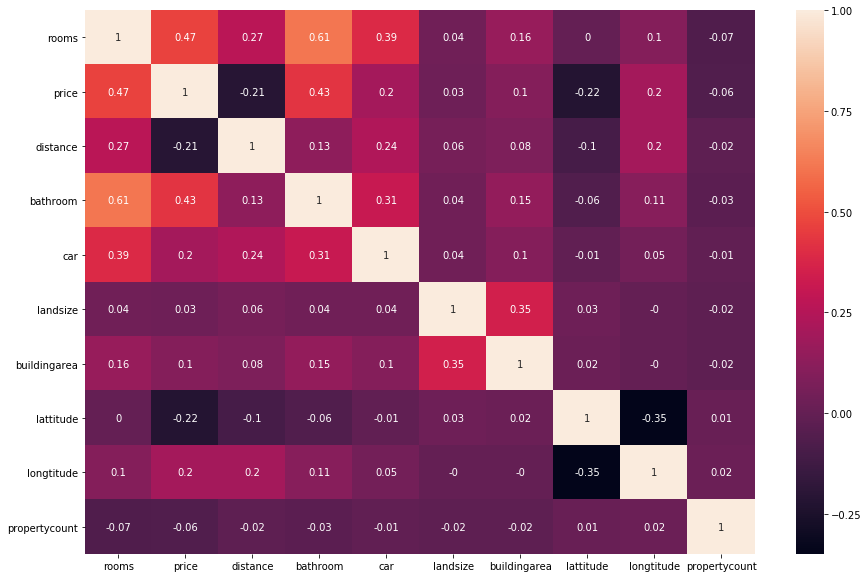

In [15]:
correlation_matrix = house.corr().round(2)
# annot = True to print the values inside the square
plt.figure(figsize=(15,10))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

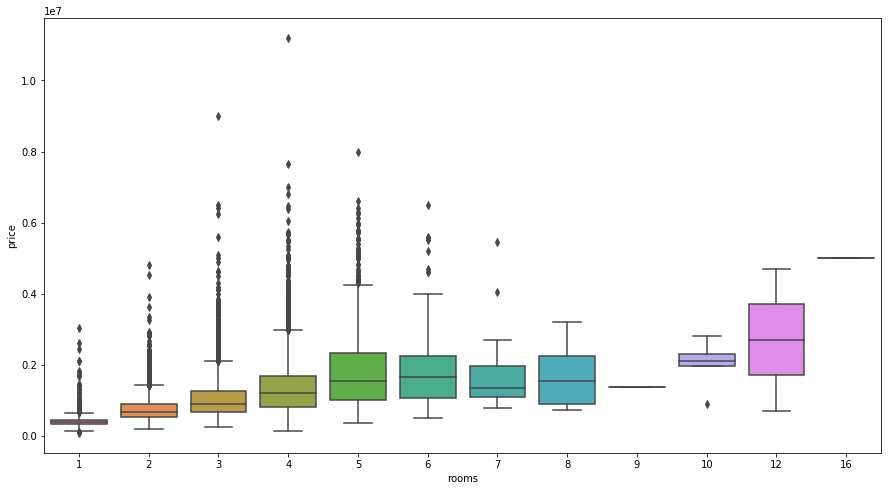

In [16]:
plt.figure(figsize=(15,8))
sns.boxplot(house['rooms'],house['price'])
plt.show()

From the above graph, we can see that the median value gradually increases as the number of rooms increase There is a linear relationship between them. Therefore, null values are filled based on the number of rooms.

### Imputation

### ----- Price Column -----

##### Filling the price column that has NULL values, with the mean price based on the number of rooms and type
**House prices are depends on type (units/ house/ townhouse)**


In [17]:
#Type of houses
house.type.unique()

[h, u, t]
Categories (3, object): [h, u, t]

In [18]:
#room_avgPrice = house.groupby('rooms')['price'].mean()
room_avgPrice = house.groupby(['type','suburb','rooms'])['price'].mean()
room_avgPrice


type  suburb              rooms
h     Abbotsford          2        1.105481e+06
                          3        1.267894e+06
                          4        1.614250e+06
      Aberfeldie          1        1.720000e+06
                          2        1.060000e+06
                          3        1.358969e+06
                          4        1.768400e+06
                          5        2.028667e+06
      Airport West        2        6.038333e+05
                          3        8.148308e+05
                          4        9.400625e+05
                          5        9.383333e+05
                          6        7.975000e+05
      Albanvale           3        5.324167e+05
                          4        6.075000e+05
      Albert Park         1        9.850000e+05
                          2        1.623640e+06
                          3        2.078850e+06
                          4        2.975417e+06
                          5        2.100000e+06
        

average price values are Null for townhouses and units. Filled those prices based on num: of rooms. Type is not considered for those 3 null values

In [19]:
for a in room_avgPrice:
    if np.isnan(a):
        room_avgPrice[room_avgPrice.isnull()] = house.groupby('rooms')['price'].mean()

In [20]:
#room_avgPrice

In [21]:
def fill_price(cols):
    price = cols[0]
    rooms = cols[1]
    typeof_house = cols[2]
    suburb = cols[3]
    
    if pd.isnull(price):
        for index,avgPrice in room_avgPrice.iteritems():
            if (rooms == index[2]) & (suburb == index[1]) & (typeof_house == index[0]):
               return avgPrice
    else:
        return price
    

In [22]:
house['price'] = house[['price','rooms','type','suburb']].apply(fill_price, axis=1)

In [23]:
print("Null Values in the price column : ",house.price.isnull().sum())


Null Values in the price column :  0


There are no any Null values for `price` column.

### ----- Bathroom Column -----

###### Filling the bathroom column that has NULL values and 0's, with the mean bathrooms based on the number of room

In [24]:
room_avg_bathroom = round(house.groupby('rooms')['bathroom'].mean())
#room_avg_bathroom = house.groupby('rooms')['bathroom'].mean()
room_avg_bathroom


rooms
1     1.0
2     1.0
3     1.0
4     2.0
5     3.0
6     3.0
7     3.0
8     4.0
9     2.0
10    5.0
12    5.0
16    8.0
Name: bathroom, dtype: float64

In [25]:

def fill_bathroom(cols):
    bathroom = cols[0]
    rooms = cols[1]
    
    if pd.isnull(bathroom) or bathroom == 0:
        for index,avg_bathroom in room_avg_bathroom.iteritems():
            if rooms == index:
               return avg_bathroom
    else:
        return bathroom
    

In [26]:
house['bathroom'] = house[['bathroom','rooms']].apply(fill_bathroom, axis=1)


In [27]:
print("Null Values in the bathroom column : ",house.bathroom.isnull().sum())


Null Values in the bathroom column :  0


There is no any NAN values for `bathroom` column.

In [28]:
#Covert 'bathroom' datatype as int
house['bathroom'] = house['bathroom'].astype(int)


### ----- Car Column -----

###### Filling the car column that has NULL values, with the mean car space based on the number of room

In [29]:
avg_carSpace = round(house.groupby('rooms')['car'].mean())
avg_carSpace



rooms
1     1.0
2     1.0
3     2.0
4     2.0
5     2.0
6     3.0
7     3.0
8     3.0
9     5.0
10    2.0
12    3.0
16    8.0
Name: car, dtype: float64

In [30]:
def fill_car(col):
    car = col[0]
    rooms = col[1]
    
    if pd.isnull(car):
        if rooms > 6:
            return 3
        if rooms >= 3:
            return 2
        else:
            return 1
    else:
        return car


In [31]:
house['car'] = house[['car','rooms']].apply(fill_car, axis=1)

In [32]:
print("Null Values in the car column : ",house.car.isnull().sum())

Null Values in the car column :  0


In [33]:
#Convert 'car' datatype to int
house['car'] = house['car'].astype(int)


In [34]:
getHead(house)


,suburb,address,rooms,type,price,method,sellerg,date,distance,postcode,bathroom,car,landsize,buildingarea,councilarea,lattitude,longtitude,regionname,propertycount
0,Abbotsford,68 Studley St,2,h,1.105481e+06,SS,Jellis,3/09/2016,2.5,3067.0,1,1,126.0,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1.480000e+06,S,Biggin,3/12/2016,2.5,3067.0,1,1,202.0,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1.035000e+06,S,Biggin,4/02/2016,2.5,3067.0,1,0,156.0,79.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,1.187200e+06,VB,Rounds,4/02/2016,2.5,3067.0,2,1,0.0,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1.465000e+06,SP,Biggin,4/03/2017,2.5,3067.0,2,0,134.0,150.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [35]:

house.describe()

,rooms,price,distance,bathroom,car,landsize,buildingarea,lattitude,longtitude,propertycount
count,34857.000000,3.485700e+04,34856.000000,34857.000000,34857.000000,23047.000000,13742.00000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.101297e+06,11.184929,1.538285,1.699859,593.598993,160.25640,-37.810634,145.001851,7572.888306
std,0.969933,6.668968e+05,6.788892,0.697366,0.910279,3398.841946,401.26706,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,1.000000,0.000000,0.000000,0.00000,-38.190430,144.423790,83.000000
25%,2.000000,6.510000e+05,6.400000,1.000000,1.000000,224.000000,102.00000,-37.862950,144.933500,4385.000000
50%,3.000000,9.080000e+05,10.300000,1.000000,2.000000,521.000000,136.00000,-37.807600,145.007800,6763.000000
75%,4.000000,1.359167e+06,14.000000,2.000000,2.000000,670.000000,188.00000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,12.000000,26.000000,433014.000000,44515.00000,-37.390200,145.526350,21650.000000


minimum house price is AUD 85,000. But it is correct value for that property. https://www.realestate.com.au/sold/property-apartment-vic-footscray-123273454

In [36]:
house[house['price'] == 85000.0]

,suburb,address,rooms,type,price,method,sellerg,date,distance,postcode,bathroom,car,landsize,buildingarea,councilarea,lattitude,longtitude,regionname,propertycount
4378,Footscray,202/51 Gordon St,1,u,85000.0,PI,Burnham,3/09/2016,6.4,3011.0,1,0,0.0,NaN,Maribyrnong City Council,-37.7911,144.89,Western Metropolitan,7570.0


### Check null values for distance

In [37]:
#Check null values for distance
house[house['distance'].isnull()]

,suburb,address,rooms,type,price,method,sellerg,date,distance,postcode,bathroom,car,landsize,buildingarea,councilarea,lattitude,longtitude,regionname,propertycount
29483,Fawkner Lot,1/3 Brian St,3,h,616000.0,SP,Brad,6/01/2018,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 `distance` column null value for `1/3 Brian St Fawkner`.  distance is entered manually

In [38]:
house[house['landsize'].isnull()]

,suburb,address,rooms,type,price,method,sellerg,date,distance,postcode,bathroom,car,landsize,buildingarea,councilarea,lattitude,longtitude,regionname,propertycount
15,Abbotsford,217 Langridge St,3,h,1.000000e+06,S,Jellis,8/10/2016,2.5,3067.0,1,2,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
16,Abbotsford,18a Mollison St,2,t,7.450000e+05,S,Jellis,8/10/2016,2.5,3067.0,1,1,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
19,Abbotsford,403/609 Victoria St,2,u,5.420000e+05,S,Dingle,8/10/2016,2.5,3067.0,1,1,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
21,Abbotsford,25/84 Trenerry Cr,2,u,7.600000e+05,SP,Biggin,10/12/2016,2.5,3067.0,1,1,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
22,Abbotsford,106/119 Turner St,1,u,4.810000e+05,SP,Purplebricks,10/12/2016,2.5,3067.0,1,1,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
26,Abbotsford,22 Park St,4,h,1.985000e+06,S,Biggin,12/11/2016,2.5,3067.0,2,2,NaN,NaN,Yarra City Council,-37.8084,144.9942,Northern Metropolitan,4019.0
27,Abbotsford,13/84 Trenerry Cr,1,u,5.000000e+05,S,Biggin,12/11/2016,2.5,3067.0,1,1,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
33,Abbotsford,250 Langridge St,2,t,8.470000e+05,S,Jellis,16/07/2016,2.5,3067.0,1,1,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
34,Abbotsford,16b Mollison St,2,h,1.105481e+06,PI,Biggin,16/07/2016,2.5,3067.0,1,1,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
45,Abbotsford,65/80 Trenerry Cr,1,u,4.800000e+05,S,Biggin,19/11/2016,2.5,3067.0,1,1,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0


In [39]:
house[(house['type']== 'u') & (house['rooms']== 8)]

,suburb,address,rooms,type,price,method,sellerg,date,distance,postcode,bathroom,car,landsize,buildingarea,councilarea,lattitude,longtitude,regionname,propertycount
3288,Coburg,35 The Grove,8,u,2250000.0,PI,Peter,4/03/2017,7.8,3058.0,2,4,983.0,NaN,Darebin City Council,-37.7517,144.9699,Northern Metropolitan,11204.0
7590,Parkville,42 Park Dr,8,u,3210000.0,S,Kelly,10/12/2016,2.6,3052.0,4,3,NaN,NaN,Melbourne City Council,NaN,NaN,Northern Metropolitan,2309.0


In [305]:
#Set land size manually. got data from the internet
house.iloc[7590,12] = 368
#Wrong land size
house.iloc[3288,12] = 1226
# wrong num of bathrooms. it was 12 corrected as 2
house.iloc[2536,10] = 2

#house[house['car'] >10]
# Wrong car space data
house.iloc[6017,11] = 2
house.iloc[25839,11] = 2
house.iloc[32862,11] = 2

#fill Nan value for distance column
house.iloc[29483,8] = 26.1

#wrong price value
house.iloc[30786,4] = 1190000

#wrong price value
house.iloc[30915,4] = 670000
house.iloc[30915,3] = 'h'

In [41]:
#house[(house['distance'] < 2) & (house['distance'] > 1)]

In [224]:
house['landsize'].isnull().sum()

11809

`landsize` column has 11809 Null values.  `landsize` column is dropped

### EDA

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

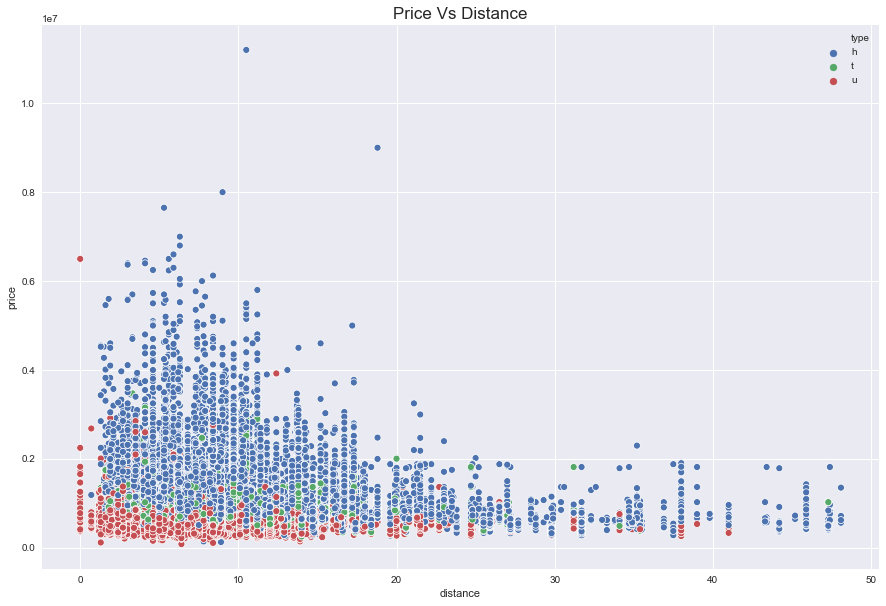

In [225]:
plt.style.use('seaborn')

plt.figure(figsize=(15,10))
sns.scatterplot(x='distance',y='price',hue='type', data = house)
plt.title('Price Vs Distance',fontdict={'fontsize': 17})
plt.plot

**There is a negative correlation between Distance from Melbourne's Central Business District (CBD) and Price**

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

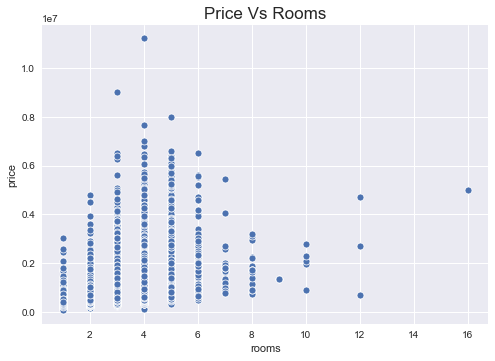

In [226]:
sns.scatterplot(x='rooms',y='price', data = house)
plt.title('Price Vs Rooms',fontdict={'fontsize': 17})
plt.plot

**The majority of houses in the dataset have 3, 4 or 5 rooms.**

###### Price is depends on type - `house`, `unit`, `townhouse`

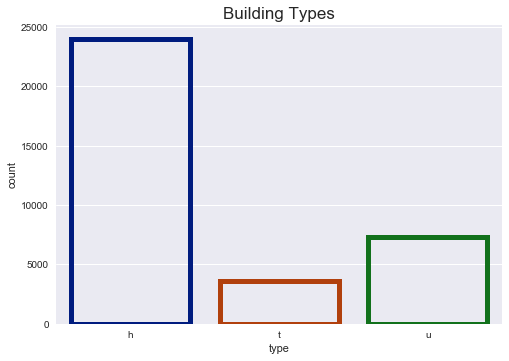

In [227]:

plt.title('Building Types',fontdict={'fontsize': 17})
#sns.countplot(house.type, palette="Set3")
sns.countplot(house.type, palette="Set3", facecolor=(0, 0, 0, 0),
              linewidth=5,edgecolor=sns.color_palette("dark", 3))
               
plt.show()

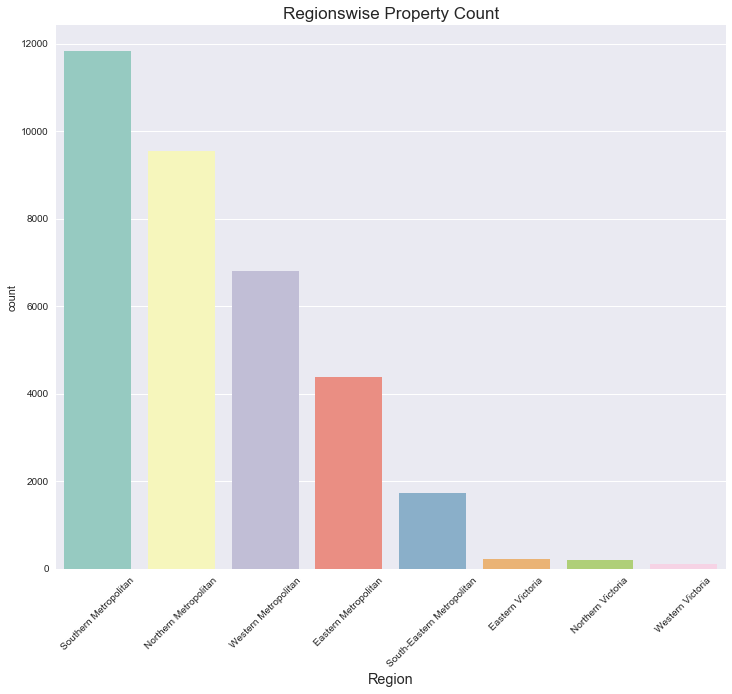

In [228]:
plt.figure(figsize=(12,10))
plt.title('Regionswise Property Count',fontdict={'fontsize': 17})
plt.xticks(rotation=45)
sns.countplot(house.regionname, palette="Set3", order=house.regionname.value_counts().index)
plt.xlabel('Region',fontsize='x-large')
plt.show()

##### Southern Metropolitan have more property

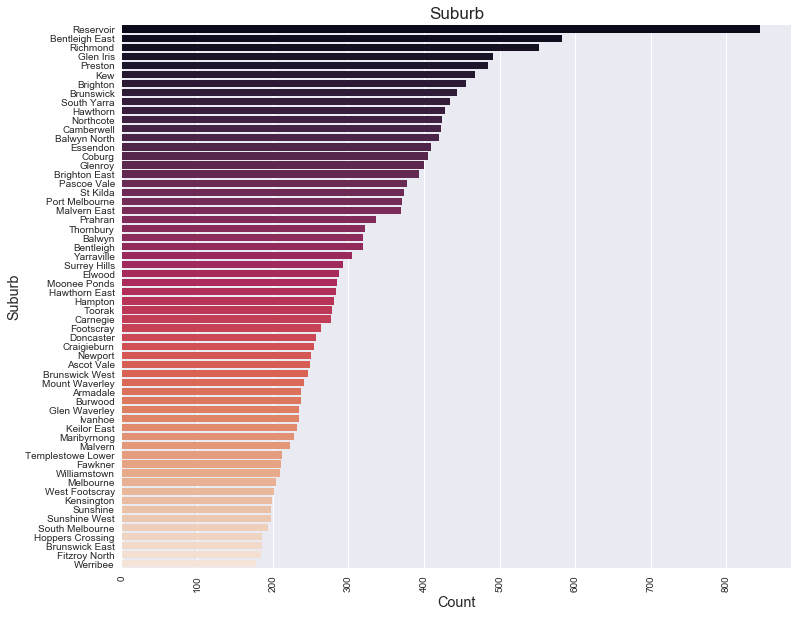

In [229]:
plt.figure(figsize=(12,10))
plt.title('Suburb',fontdict={'fontsize': 17})
plt.xticks(rotation=90)
sns.countplot(y = house.suburb, palette="rocket",
              order=house.suburb.value_counts().iloc[:60].index)
plt.ylabel('Suburb',fontsize='x-large')
plt.xlabel('Count',fontsize='x-large')
plt.show()

##### Reservoir have more property count

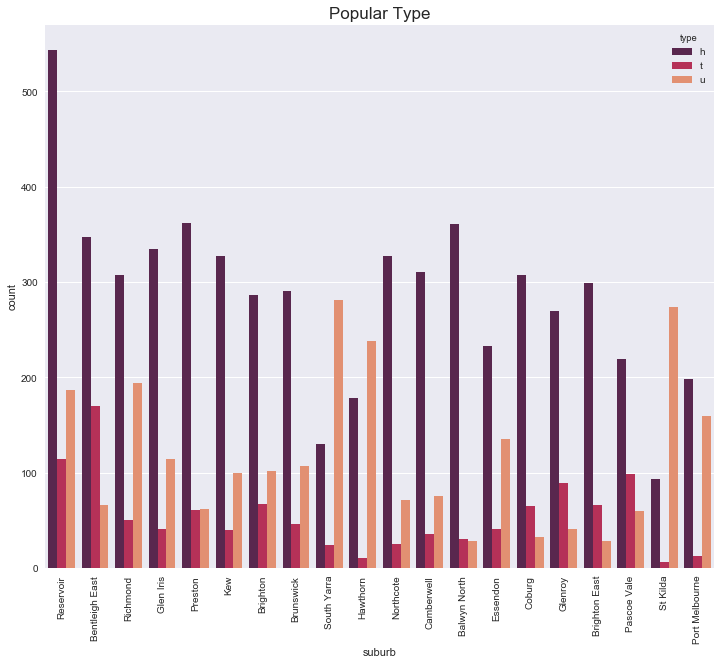

In [230]:
plt.figure(figsize=(12,10))
plt.title('Popular Type',fontdict={'fontsize': 17})
sns.countplot(x = house.suburb, palette="rocket",hue = house.type,
              order=house.suburb.value_counts().iloc[:20].index)
plt.xticks(rotation=90)
plt.show()

##### H- type property have wide spread among all suburb except Hawthon ,South yarra, St kilda , Hawthron and Port Melbourne

In [231]:
dfSuburb = house.groupby(['suburb'])['price'].mean().rename(
                "avgPrice").reset_index()
dfSuburb = dfSuburb.sort_values(['avgPrice'],ascending=False)
dfSuburb = dfSuburb.head(10)
dfSuburb

,suburb,avgPrice
64,Canterbury,2.471753e+06
104,Deepdene,2.316455e+06
220,Middle Park,2.290369e+06
207,Malvern,2.163508e+06
44,Brighton,2.126642e+06
4,Albert Park,2.001176e+06
22,Balwyn,1.950060e+06
313,Toorak,1.923302e+06
62,Camberwell,1.911875e+06
188,Kew,1.888557e+06


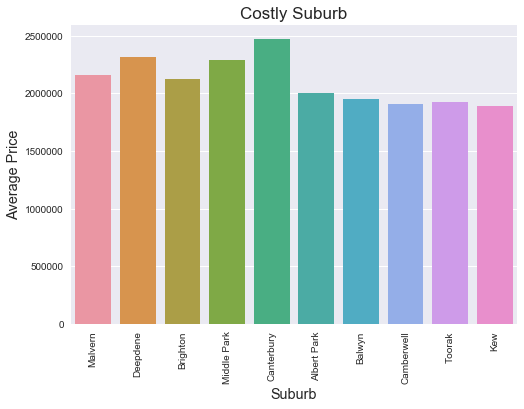

In [232]:
sns.barplot(x=dfSuburb.suburb, y=dfSuburb.avgPrice, 
            order=dfSuburb.suburb.value_counts().iloc[0:10].index)
plt.xticks(rotation=90)
plt.ylabel("Average Price",fontsize='x-large')
plt.xlabel("Suburb",fontsize='x-large')
plt.title('Costly Suburb',fontdict={'fontsize': 17})
plt.show()

Canterbury, Deepdene,Middle Park have more property price

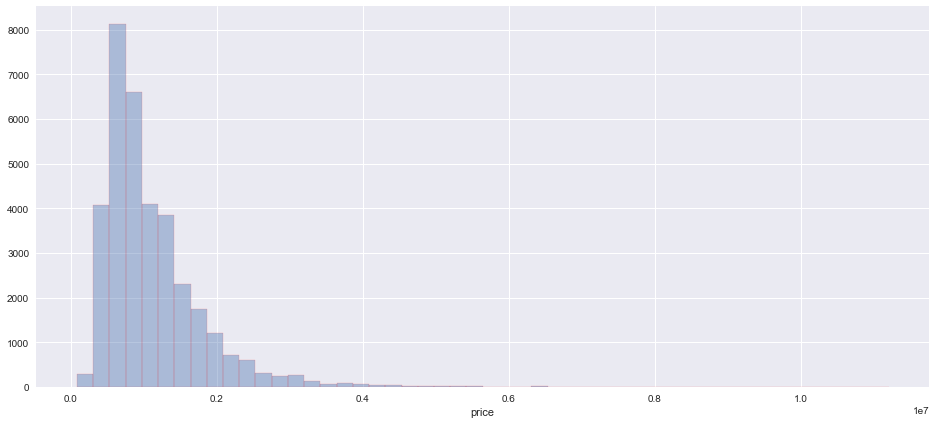

In [233]:
plt.figure(figsize=(16,7))
sns.distplot(house['price'], kde = False,hist_kws=dict(edgecolor="r"))
plt.show()

##### The dependent (or target)  is `Price`. This variable appears to be  skewed to the right. 
***The majority of houses are around `$600k to $650K` with some outliers around `$7M`.***

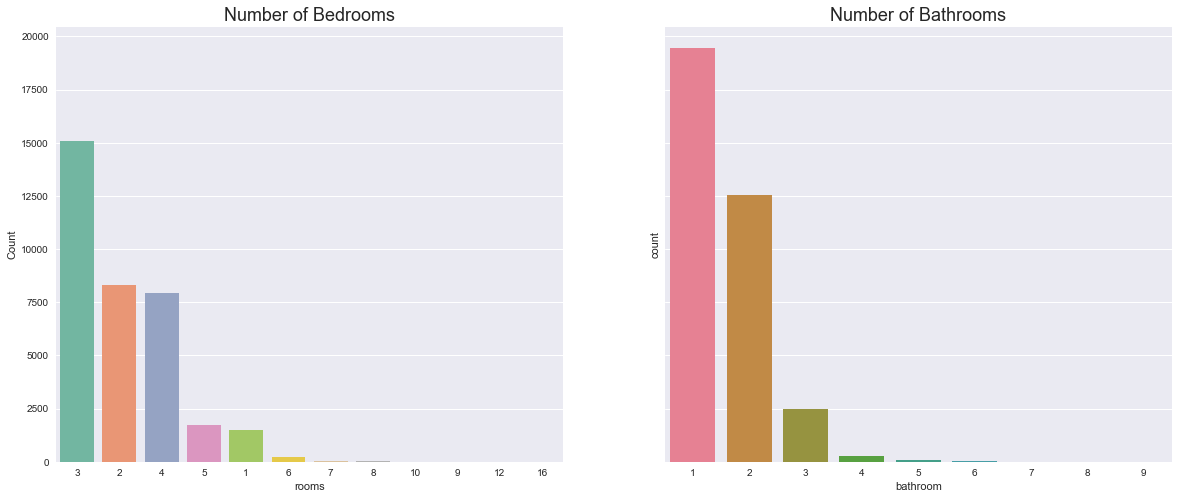

In [234]:
ig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,sharey=True, figsize=(20, 8))

#house['rooms'].value_counts().plot(kind='bar', ax=ax1)
sns.countplot(house.rooms, palette="Set2", order=house.rooms.value_counts().index, ax=ax1)
ax1.set_title('Number of Bedrooms',fontsize=18)
ax1.set_ylabel('Count')

#house['bathroom'].value_counts().plot(kind='bar', ax=ax2)
sns.countplot(house.bathroom, palette="husl", order=house.bathroom.value_counts().index, ax=ax2)
ax2.set_title('Number of Bathrooms', fontsize=18)
plt.show()

Three-bedroom and one-bathroom homes are most prominent.

<Figure size 720x720 with 0 Axes>

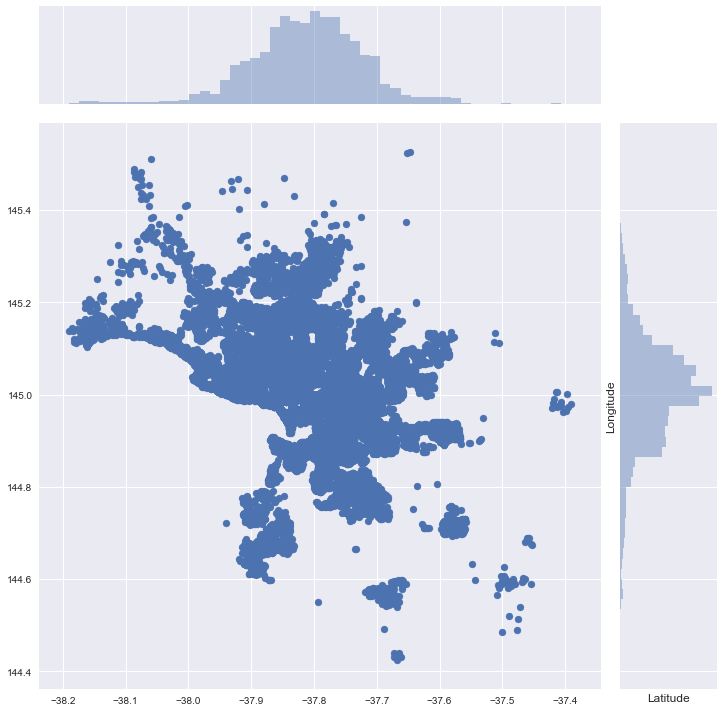

In [235]:
 #Visualize the home locations based on latitude and longitude.
plt.figure(figsize=(10,10))
sns.jointplot(x=house.lattitude.values, y=house.longtitude.values, height=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

The homes are concentrated in the -37.8  latitude and  145 longitude.

In [236]:
room3_typeh = (house['rooms'] == 3) & (house['type'] == 'h')
house[(house['distance'] < 5) & (house['distance'] > 4) & room3_typeh ].describe()

,rooms,price,distance,bathroom,car,landsize,buildingarea,lattitude,longtitude,propertycount
count,326.0,3.260000e+02,326.000000,326.000000,326.000000,252.000000,162.000000,286.000000,286.000000,326.000000
mean,3.0,1.730671e+06,4.424540,1.478528,1.469325,353.277778,149.381481,-37.815824,144.972975,6704.254601
std,0.0,8.217085e+05,0.174565,0.585333,0.926853,546.530982,56.658444,0.033702,0.045361,2278.644207
min,3.0,6.000000e+05,4.100000,1.000000,0.000000,0.000000,0.000000,-37.859000,144.873350,1052.000000
25%,3.0,1.170000e+06,4.300000,1.000000,1.000000,198.750000,117.000000,-37.849770,144.926738,5263.000000
50%,3.0,1.530000e+06,4.500000,1.000000,2.000000,262.500000,135.000000,-37.818150,144.987405,6892.000000
75%,3.0,1.888750e+06,4.600000,2.000000,2.000000,368.250000,174.000000,-37.781300,145.007330,7717.000000
max,3.0,6.400000e+06,4.600000,4.000000,5.000000,8216.000000,397.000000,-37.758900,145.045900,11308.000000


In [237]:
house[(house['distance'] < 5) & (house['distance'] > 4) & room3_typeh & 
      (house['price'] == 6.400000e+06)]

,suburb,address,rooms,type,price,method,sellerg,date,distance,postcode,bathroom,car,landsize,buildingarea,councilarea,lattitude,longtitude,regionname,propertycount
27384,Toorak,22 Lansell Rd,3,h,6400000.0,S,RT,2017-11-11,4.1,3142.0,1,2,NaN,NaN,Stonnington City Council,NaN,NaN,Southern Metropolitan,7217.0


In [238]:

#price1 = round(house[(house['distance'] < 1) & room3_typeh]['price'].mean())


price12 = round(house[(house['distance'] < 2) & (house['distance'] > 1) & room3_typeh]['price'].mean())
#price23 = round(house[(house['distance'] < 3) & (house['distance'] > 2) & room3_typeh]['price'].mean())
price34 = round(house[(house['distance'] < 4) & (house['distance'] > 3) & room3_typeh]['price'].mean())
#price45 = round(house[(house['distance'] < 5) & (house['distance'] > 4) & room3_typeh]['price'].mean())
price5_10 = round(house[(house['distance'] < 10) & (house['distance'] > 5) & room3_typeh]['price'].mean())
price10_20 = round(house[(house['distance'] < 20) & (house['distance'] > 10) & room3_typeh]['price'].mean())
price20_30 = round(house[(house['distance'] < 30) & (house['distance'] > 20) & room3_typeh]['price'].mean())
price30_40 = round(house[(house['distance'] < 40) & (house['distance'] > 30) & room3_typeh]['price'].mean())
price40_50 = round(house[(house['distance'] < 50) & (house['distance'] > 40) & room3_typeh]['price'].mean())

In [239]:
import folium
from folium.plugins import MarkerCluster
from folium.map import *
from branca.colormap import linear

In [240]:
#(-37.815285, 144.961884) Melbourne CBD coordinates
map_distance_vs_price = folium.Map(location=[-37.81, 144.96],
                        zoom_start = 9)
#Uni Point
folium.Marker([-37.7963, 144.9614],
              popup='Melbourne University',
              icon=folium.Icon(color='red',icon='cloud')
              ).add_to(map_distance_vs_price)



# Circle marker
folium.Circle([-37.81, 144.96],
                    radius=50000,
                    popup='Price: $'+ str(price40_50),
                    color='#602320',
                    fill=True,
                    fill_color='#602320',
                    fill_opacity=0.01
                   ).add_to(map_distance_vs_price)

folium.Circle([-37.81, 144.96],
                    radius=40000,
                    popup='Price: $'+str(price30_40),
                    color='#a32020',
                    fill=True,
                    fill_color='#a32020',
                    fill_opacity=0.01
                   ).add_to(map_distance_vs_price)

folium.Circle([-37.81, 144.96],
                    radius=30000,
                    popup='Price: $'+str(price20_30),
                    color='#eb8c00',
                    fill=True,
                    fill_color='#eb8c00',
                    fill_opacity=0.01
                   ).add_to(map_distance_vs_price)

folium.Circle([-37.81, 144.96],
                    radius=20000,
                    popup='Price: $'+ str(price10_20),
                    color='#dc6900',
                    fill=True,
                    fill_color='#dc6900',
                    fill_opacity=0.01
                   ).add_to(map_distance_vs_price)


folium.Circle([-37.81, 144.96],
                    radius=4000,
                    popup='Price: $'+ str(price34),
                    color='#dc6900',
                    fill=True,
                    fill_color='#dc6900',
                    fill_opacity=0.01
                   ).add_to(map_distance_vs_price)

folium.Circle([-37.81, 144.96],
                    radius=2000,
                    popup='Price: $'+ str(price12),
                    color='#dc6900',
                    fill=True,
                    fill_color='#dc6900',
                    fill_opacity=0.01
                   ).add_to(map_distance_vs_price)



map_distance_vs_price

In [241]:
house.describe()

,rooms,price,distance,bathroom,car,landsize,buildingarea,lattitude,longtitude,propertycount
count,34857.000000,3.485700e+04,34857.000000,34857.000000,34857.000000,23048.000000,13742.00000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.101284e+06,11.185357,1.537998,1.698454,593.599748,160.25640,-37.810634,145.001851,7572.888306
std,0.969933,6.668990e+05,6.789265,0.695116,0.895303,3398.770118,401.26706,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,1.000000,0.000000,0.000000,0.00000,-38.190430,144.423790,83.000000
25%,2.000000,6.510000e+05,6.400000,1.000000,1.000000,224.000000,102.00000,-37.862950,144.933500,4385.000000
50%,3.000000,9.078000e+05,10.300000,1.000000,2.000000,521.000000,136.00000,-37.807600,145.007800,6763.000000
75%,4.000000,1.358969e+06,14.000000,2.000000,2.000000,670.000000,188.00000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,9.000000,12.000000,433014.000000,44515.00000,-37.390200,145.526350,21650.000000


### Dummy variables

In [242]:
house_with_dummies = pd.get_dummies(data=house,
                                      columns=['type'],
                                      prefix=['type'])
house_with_dummies.head()

,suburb,address,rooms,price,method,sellerg,date,distance,postcode,bathroom,...,landsize,buildingarea,councilarea,lattitude,longtitude,regionname,propertycount,type_h,type_t,type_u
0,Abbotsford,68 Studley St,2,1.105481e+06,SS,Jellis,2016-09-03,2.5,3067.0,1,...,126.0,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,1,0,0
1,Abbotsford,85 Turner St,2,1.480000e+06,S,Biggin,2016-12-03,2.5,3067.0,1,...,202.0,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,1,0,0
2,Abbotsford,25 Bloomburg St,2,1.035000e+06,S,Biggin,2016-02-04,2.5,3067.0,1,...,156.0,79.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,1,0,0
3,Abbotsford,18/659 Victoria St,3,1.187200e+06,VB,Rounds,2016-02-04,2.5,3067.0,2,...,0.0,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,0,0,1
4,Abbotsford,5 Charles St,3,1.465000e+06,SP,Biggin,2017-03-04,2.5,3067.0,2,...,134.0,150.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,1,0,0


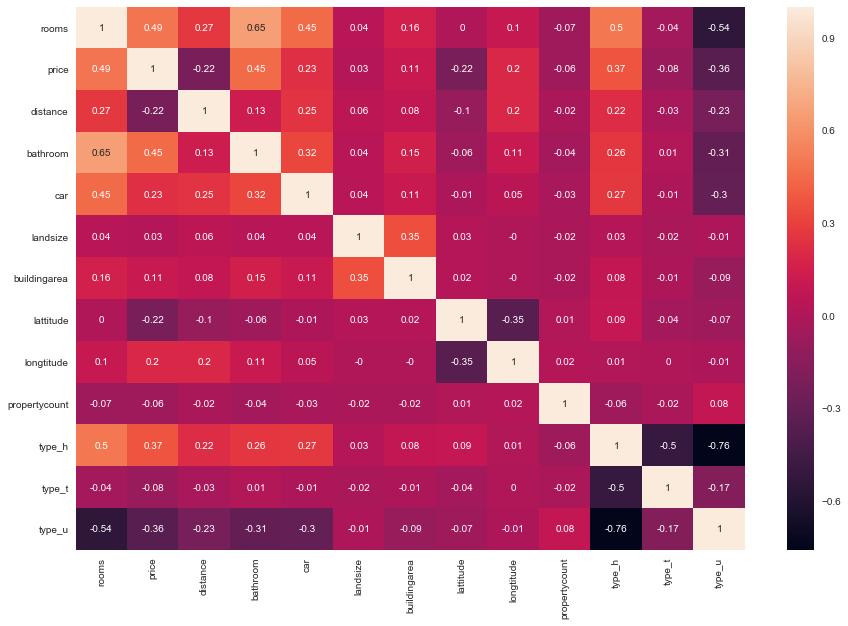

In [243]:
correlation_matrix = house_with_dummies.corr().round(2)
# annot = True to print the values inside the square
plt.figure(figsize=(15,10))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [244]:
house["date"] = pd.to_datetime(house["date"],dayfirst=True)

### Splitting the dataset

In [245]:
y =  house_with_dummies['price'].values

In [246]:
#X = house_with_dummies[['rooms','distance', 'bathroom', 'car','type_h','type_t','type_u']].values
#X = house[['rooms','distance', 'bathroom', 'car']].values
X = house_with_dummies[['rooms','distance', 'bathroom', 'car','type_h','type_u']]


In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Feature Selection

Lab-04_2 

In [248]:
## Use Forward Feature Selection to pick a good model
show_steps = False
# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LinearRegression()
# get the number of cases in the test data
n = X_test.shape[0]

while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        fit = model.fit(X_train[included + [new_column]], y_train)
        # calculate the score (R^2 for Regression)
        r2 = fit.score(X_train[included + [new_column]], y_train)
        # number of predictors in this model
        k = len(included) + 1
        # calculate the adjusted R^2
        adjusted_r2 = 1 - ( ( (1 - r2) * (n - 1) ) / (n - k - 1) )

        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    # END for

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        print('*'*50)
        break

print('')
print('Resulting features:')
print(', '.join(included))

Added feature rooms with R^2 = 0.242 and adjusted R^2 = 0.242
Added feature distance with R^2 = 0.379 and adjusted R^2 = 0.379
Added feature type_h with R^2 = 0.409 and adjusted R^2 = 0.409
Added feature bathroom with R^2 = 0.435 and adjusted R^2 = 0.435
Added feature type_u with R^2 = 0.437 and adjusted R^2 = 0.437
Added feature car  with R^2 = 0.438 and adjusted R^2 = 0.438
**************************************************

Resulting features:
rooms, distance, type_h, bathroom, type_u, car


## Machine Learning

### Linear Regression

In [249]:
# Create a model for Linear Regression
model = LinearRegression()  

# Fit the model with the Training data
model.fit(X_train, y_train)

# Calculate the score (R^2 for Regression) for Training Data
r_sq_train = model.score(X_train, y_train)
print('R^2 for Regression for Training Data : ', r_sq_train)

# Calculate the score (R^2 for Regression) for Testing Data
r_sq_test = model.score(X_test, y_test)
print('R^2 for Regression for Testing Data : ', r_sq_test)

R^2 for Regression for Training Data :  0.43817130591172776
R^2 for Regression for Testing Data :  0.4513595827102964


In [250]:
#Prediction
#print("Predict value " + str(model.predict([X_test[141]])))
#print("Real value " + str(y_test[141]))
y_predict = model.predict(X_test)
Actual_Price=y_test



In [251]:
out = pd.DataFrame({'Actual_Price': Actual_Price, 'predict_Price': y_predict,'Diff' :(Actual_Price-y_predict)})


In [252]:
out[['Actual_Price','predict_Price','Diff']].head(10)


,Actual_Price,predict_Price,Diff
0,8.570000e+05,9.415770e+05,-84577.028240
1,7.594844e+05,3.175224e+05,441962.035184
2,1.000000e+06,1.194438e+06,-194437.808808
3,4.590000e+05,4.647134e+05,-5713.387415
4,5.945000e+05,1.439504e+04,580104.958173
5,5.205000e+05,6.096035e+05,-89103.464761
6,5.135000e+05,-2.925835e+05,806083.451784
7,1.400000e+06,1.232539e+06,167461.159148
8,9.290750e+05,8.708285e+05,58246.512942
9,1.530912e+06,2.106840e+06,-575927.793477


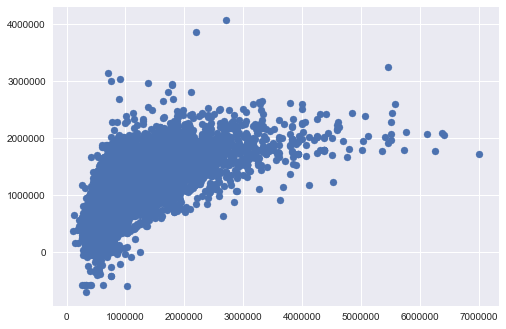

In [253]:
plt.scatter(y_test, y_predict)

plt.show()

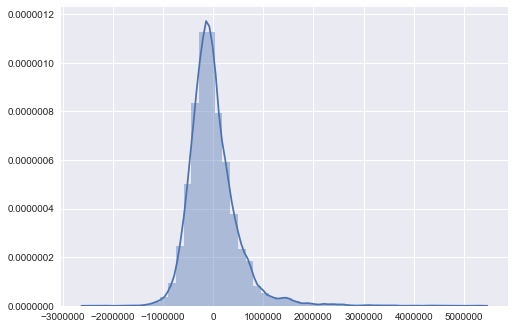

In [254]:
# Histogram of the distribution of residuals
sns.distplot(y_test- y_predict)

In [255]:
coef_df = pd.DataFrame(data = model.coef_, index = X.columns, columns = ['Coefficients'])
coef_df

,Coefficients
rooms,224783.825391
distance,-39946.874022
bathroom,205570.365900
car,28920.716605
type_h,251441.553211
type_u,-102658.826295


In [256]:
def view_coeff(X, model):
    model_coefs = pd.DataFrame({'variable': X.columns,
                                'coef': model.coef_,
                                'abs_coef': np.abs(model.coef_)})
    model_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    sns.barplot(x="variable", y="coef", data=model_coefs)

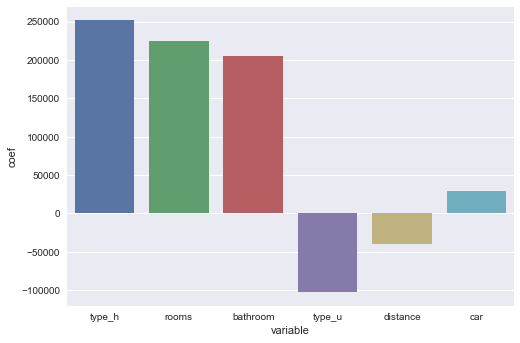

In [257]:
view_coeff(X, model)

#### Cross validation

In [258]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model,X,y,cv=5)
cv_scores

array([0.46173156, 0.45462494, 0.39187074, 0.40756096, 0.39257435])

In [259]:
np.mean(cv_scores)

0.42167250812699625

=======================================================================================

##### Random Forest Regressor

In [260]:
#Train the model
from sklearn.ensemble import RandomForestRegressor

def randomForestRegressor_model():
    model_rfr = RandomForestRegressor(n_estimators=1000)
    #Fit Model
    model_rfr.fit(X_train, y_train)
    #Score/Accuracy
    r_sq_rfrTrain = model_rfr.score(X_train, y_train)
    r_sq_rfrTest = model_rfr.score(X_test, y_test)
    print('R^2 for RandomForestRegressor for Testing Data : ', 
                  r_sq_rfrTest)
    print('R^2 for RandomForestRegressor for Training Data : ', 
                  r_sq_rfrTrain)
    
    return r_sq_rfrTrain,r_sq_rfrTest

##### Gradient Boosting Regressor

In [261]:
#Train the model
from sklearn.ensemble import GradientBoostingRegressor

def gradientBoostingRegressor():
    GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)
    #Fit Model
    GBR.fit(X_train, y_train)
    r_sq_gbrTrain = GBR.score(X_train, y_train)
    r_sq_gbrTest = GBR.score(X_test, y_test)
    print('R^2 for GradientBoostingRegressor for Testing Data : ', 
                  r_sq_gbrTest)
    print('R^2 for GradientBoostingRegressor for Training Data : ', 
                  r_sq_gbrTrain)
    return r_sq_gbrTrain,r_sq_gbrTest

##### K Nearest Neighbors

In [262]:
from sklearn.neighbors import KNeighborsRegressor

def kNeighborsRegressor():
    knn = KNeighborsRegressor(n_neighbors=10)
    knn.fit(X_train,y_train)
    r_sq_knn_Train = knn.score(X_train, y_train)
    r_sq_knn_Test = knn.score(X_test, y_test)
    print('R^2 for K Nearest Neighbors for Testing Data : ', 
                      r_sq_knn_Test)
    print('R^2 for K Nearest Neighbors for Training Data : ', 
                      r_sq_knn_Train)
    return r_sq_knn_Train,r_sq_knn_Test

=======================================================================================

### Polynimial Linear Regression

In [263]:
from sklearn.preprocessing import PolynomialFeatures

In [264]:
def polynimialModel(deg):
    x_ = PolynomialFeatures(degree=deg, include_bias=False).fit_transform(X)
    X_trainpl, X_testpl, y_trainpl, y_testpl = train_test_split(x_, y, test_size=0.3, random_state=0)
    modelPoly = LinearRegression().fit(x_, y)
    r_sqTrain = modelPoly.score(X_trainpl, y_trainpl)
    r_sqTest = modelPoly.score(X_testpl, y_testpl)
    #print(modelPoly.coef_.shape)
    print('R^2 for Polynomial Regression for Training Data : ', r_sqTrain)
    print('R^2 for Polynomial Regression for Testing Data : ', r_sqTest)
    return r_sqTrain,r_sqTest

In [265]:
r2Train,r2Test = polynimialModel(2)

R^2 for Polynomial Regression for Training Data :  0.5073662769802239
R^2 for Polynomial Regression for Testing Data :  0.5237008626754136


In [266]:
r3Train,r3Test = polynimialModel(3)

R^2 for Polynomial Regression for Training Data :  0.5209838445470438
R^2 for Polynomial Regression for Testing Data :  0.5381926975299396


In [267]:
r6Train,r6Test = polynimialModel(6)

R^2 for Polynomial Regression for Training Data :  0.5429334265764841
R^2 for Polynomial Regression for Testing Data :  0.5572875741226795


In [268]:
r7Train,r7Test = polynimialModel(7)

R^2 for Polynomial Regression for Training Data :  0.5477101387178352
R^2 for Polynomial Regression for Testing Data :  0.5611551106552621


In [269]:
r8Train,r8Test = polynimialModel(8)

R^2 for Polynomial Regression for Training Data :  0.5543239474609447
R^2 for Polynomial Regression for Testing Data :  0.5660574536504911


In [270]:
rfrTrain, rfrTest  = randomForestRegressor_model()

R^2 for RandomForestRegressor for Testing Data :  0.6214885326449686
R^2 for RandomForestRegressor for Training Data :  0.7782400073595461


In [271]:
gbrTrain, gbrTest  = gradientBoostingRegressor()

R^2 for GradientBoostingRegressor for Testing Data :  0.6394538157122567
R^2 for GradientBoostingRegressor for Training Data :  0.6440429358938996


In [272]:
knnTrain, knnTest = kNeighborsRegressor()

R^2 for K Nearest Neighbors for Testing Data :  0.601017562722967
R^2 for K Nearest Neighbors for Training Data :  0.6497194806926796


In [273]:
#selecting polyomial regression degree

n = ['linear Reg', 'degree 2', 'degree 3', 'degree 6', 'degree 7','degree 8']
x_poly = [r_sq_train, r2Train,r3Train,r6Train, r7Train, r8Train]
y_poly = [r_sq_test,r2Test, r3Test, r6Test, r7Test, r8Test]

polyR_score = pd.DataFrame({ 'Train Score': x_poly,'Test Score' :y_poly} ,index = n)
polyR_score

,Train Score,Test Score
linear Reg,0.438171,0.451360
degree 2,0.507366,0.523701
degree 3,0.520984,0.538193
degree 6,0.542933,0.557288
degree 7,0.547710,0.561155
degree 8,0.554324,0.566057


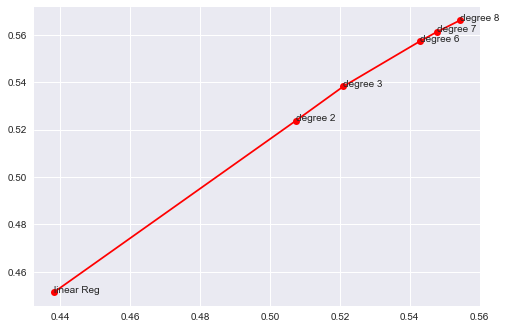

In [274]:

for i, txt in enumerate(n):
    plt.annotate(txt, xy=(x_poly[i], y_poly[i]))

#plt.annotate('linear Reg', xy=(r_sq_train, r_sq_test))
plt.plot(x_poly, 
         y_poly,'ro-')
plt.show()

Polynomial degree 6,7,8 Train and Test scores are almost same. Therefore degree 6 polynomial Regression is selected to build model

In [275]:
x_ = PolynomialFeatures(degree=6, include_bias=False).fit_transform(X)
X_trainpl, X_testpl, y_trainpl, y_testpl = train_test_split(x_, y, test_size=0.3, random_state=0)
modelPoly6 = LinearRegression().fit(x_, y)
r_sqTrain = modelPoly6.score(X_trainpl, y_trainpl)
r_sqTest = modelPoly6.score(X_testpl, y_testpl)
print('R^2 for Polynomial Regression for Training Data : ', r_sqTrain)
print('R^2 for Polynomial Regression for Testing Data : ', r_sqTest)


R^2 for Polynomial Regression for Training Data :  0.5429334265764841
R^2 for Polynomial Regression for Testing Data :  0.5572875741226795


In [276]:
y_predict6 = modelPoly6.predict(X_testpl)
Actual_Price = y_test

In [277]:
out = pd.DataFrame({'Actual_Price': Actual_Price, 
                    'predict_Price': y_predict,'Diff' :(Actual_Price-y_predict)})

In [278]:
out.head()

,Actual_Price,predict_Price,Diff
0,857000.000000,9.415770e+05,-84577.028240
1,759484.425077,3.175224e+05,441962.035184
2,1000000.000000,1.194438e+06,-194437.808808
3,459000.000000,4.647134e+05,-5713.387415
4,594500.000000,1.439504e+04,580104.958173


In [279]:
#modelPoly6.coef_
#modelPoly6.intercept_

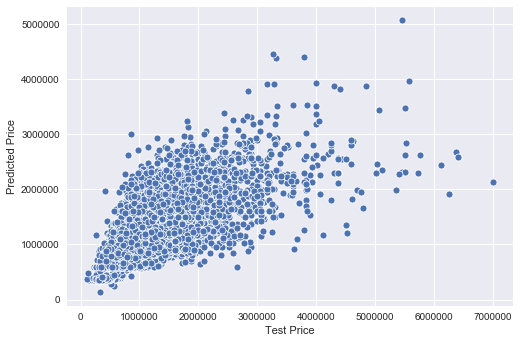

In [330]:
# plot k-fold predictions against actual
sns.scatterplot(y_test, y_predict6)
plt.xlabel('Test Price')
plt.ylabel('Predicted Price')
plt.show()

In a perfect model (overfit maybe), all our data points would be on the line, but as our data points approximate that trend, we can see the model is roughly appropriate for the test data.

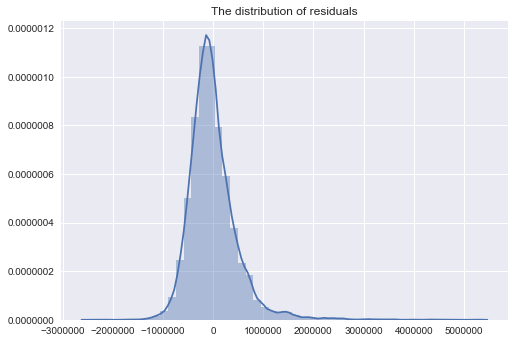

In [281]:
# Histogram of the distribution of residuals
plt.title('The distribution of residuals')
sns.distplot(y_test- y_predict)
plt.show()

### Ridge Regression

In [282]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

## Avoid some version change warnings
import warnings
warnings.filterwarnings('ignore', message='numpy.dtype size changed')

In [283]:
# ================== LAB 4.4. =============================
## Calculate Ridge Regression model

# create a model object to hold the modelling parameters
clf = Ridge()

# keep track of the intermediate results for coefficients and errors
coefs = []
errors = []

# create a range of alphas to calculate
ridge_alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in ridge_alphas:
    clf.set_params(alpha = a)
    clf.fit(X, y)
    coefs.append(clf.coef_)
    errors.append(mean_squared_error(clf.coef_, model.coef_))

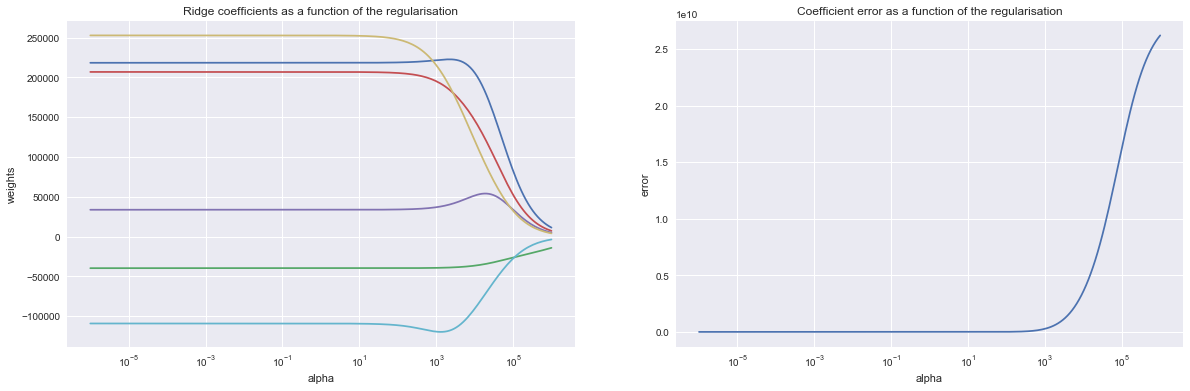

In [284]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(ridge_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(ridge_alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

In [285]:
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X, y)
print('Alpha:', optimal_ridge.alpha_)
print('Score:', optimal_ridge.score(X, y))

Alpha: 482.41087041653736
Score: 0.4420173387357903


In [286]:
rr = Ridge(alpha= optimal_ridge.alpha_ )
rr.fit(X_train, y_train)


Ridge(alpha=482.41087041653736, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [287]:
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
print ("ridge regression train score low alpha:", Ridge_train_score)
print ("ridge regression test score low alpha:", Ridge_test_score)

ridge regression train score low alpha: 0.4378949690100935
ridge regression test score low alpha: 0.45110834706074565


### Lasso Regression

In [288]:
from sklearn.linear_model import Lasso, LassoCV

In [289]:
# ================== LAB 4.4. =============================
## Calculate Lasso Regression model


# create a model object to hold the modelling parameters
# insert code here
lasso = Lasso()

# keep track of the intermediate results for coefficients and errors
# insert code here
coefs = []
errors = []

# create a range of alphas to calculate
# insert code here
lasso_alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
# insert code here
for a in lasso_alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)
    errors.append(mean_squared_error(lasso.coef_, model.coef_))

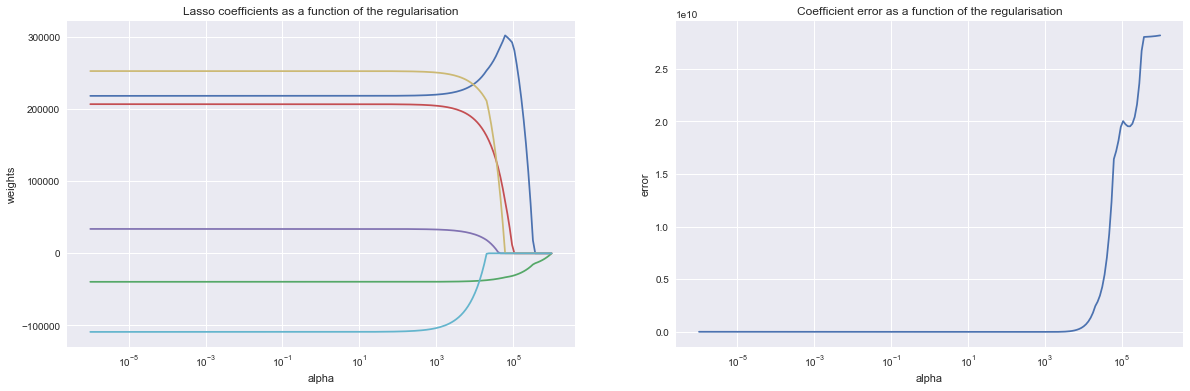

In [290]:
# Display results
# insert code here

plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(lasso_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(lasso_alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

In [291]:
# Find Optimal Lasso Using LassoCV
# insert code here
optimal_lasso = LassoCV(alphas=lasso_alphas, cv=10)
optimal_lasso.fit(X, y)
print('Alpha:', optimal_lasso.alpha_)
print('Score:', optimal_lasso.score(X, y))

Alpha: 1e-06
Score: 0.4421643374421862


In [292]:
lr = Lasso(alpha=optimal_lasso.alpha_)
lr.fit(X_train, y_train)

Lasso(alpha=1e-06, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [293]:
Lasso_train_score = lr.score(X_train,y_train)
Lasso_test_score = lr.score(X_test, y_test)
print ("lasso regression train score low alpha:", Lasso_train_score)
print ("lasso regression test score low alpha:", Lasso_test_score)

lasso regression train score low alpha: 0.43817130591172776
lasso regression test score low alpha: 0.45135958271019383


### Lasso for feature selection

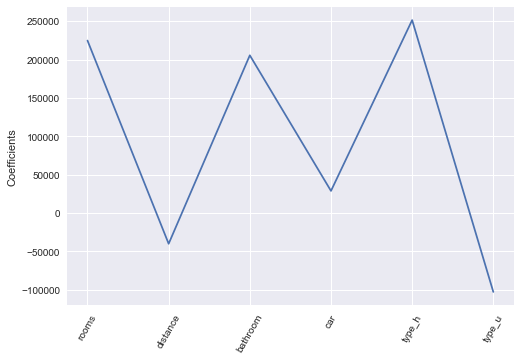

In [294]:
lasso_coef = lr.coef_
col = X.columns

_ = plt.plot(range(len(col)), lasso_coef)
_ = plt.xticks(range(len(col)), col, rotation=60) 
_  = plt.ylabel('Coefficients')
plt.show()

Can be used to select important features of a dataset,                                  
Shrinks the coefficients of less important features to exactly 0

According to the lasso algorithm, it seems like room /distance /bathroom /car/ type_h/ type_u features are the most important  when predicting price.

In [295]:
model_type = ['Linear Regression','Polynimial LR Deg2','Polynimial LR Deg3',
              'Polynimial LR Deg6','Polynimial LR Deg7','Polynimial LR Deg8',
              'Random Forest Regressor','Gradient Boosting Regressor',
              'Ridge Regression','Lasso Regression', 'K Nearest Neighbors']
tr_R2score = [r_sq_train, r2Train, r3Train , r6Train , r7Train, r8Train, 
              rfrTrain, gbrTrain, Ridge_train_score, Lasso_train_score,knnTrain ]

ts_R2score = [r_sq_test, r2Test, r3Test, r6Test, r7Test, r8Test, rfrTest,gbrTest,
              Ridge_test_score,Lasso_test_score , knnTest ]
finalModelR2Score = pd.DataFrame({'Model': model_type, 
                    'Train Score': tr_R2score,'Test Score' :ts_R2score})





# Conclusion

Imputing missing values allowed to improve model compared to dropping those columns. 

In [296]:
finalModelR2Score = finalModelR2Score.set_index(['Model'])
finalModelR2Score

,Train Score,Test Score
Model,,
Linear Regression,0.438171,0.451360
Polynimial LR Deg2,0.507366,0.523701
Polynimial LR Deg3,0.520984,0.538193
Polynimial LR Deg6,0.542933,0.557288
Polynimial LR Deg7,0.547710,0.561155
Polynimial LR Deg8,0.554324,0.566057
Random Forest Regressor,0.778240,0.621489
Gradient Boosting Regressor,0.644043,0.639454
Ridge Regression,0.437895,0.451108


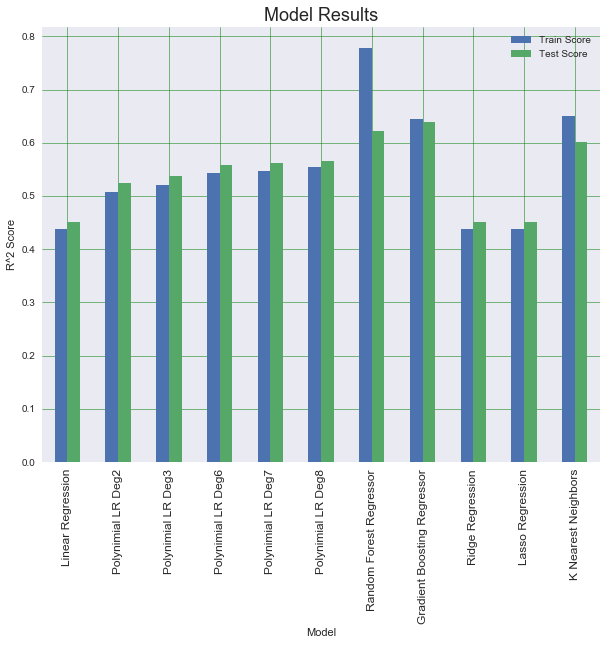

In [297]:
finalModelR2Score.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xticks(fontsize=12)
plt.title('Model Results',fontsize=18)
plt.ylabel('R^2 Score')
plt.show()

I have selected Polynimial Linear Regression Deg6 as my final model

===============================  Extra ==================================

In [306]:
from ipywidgets import GridspecLayout, Layout, Button,  Dropdown, Label
import ipywidgets as widgets


lblRoom = Label("Number of rooms : ")
txtRoom = widgets.Text("0")


lblDistance = Label("Distance to CBD :")
txtDistance = widgets.Text("0")

lblHouseType = Label("House Type : ")
txtType = widgets.Text()

lblBathrooms = Label("Number of bathrooms : ")
txtBathrooms = widgets.Text("0")

lblCar = Label("Number of car space :  ")
txtCar = widgets.Text("0")

btn_predict = Button(description='Predict') 

lblPredict = Label(" ")

drdType =  widgets.Dropdown(options=['House', 'Unit'])



grid = GridspecLayout(7, 2)

grid[0,0] = lblRoom
grid[0,1] = txtRoom
grid[1,0] = lblDistance
grid[1,1] = txtDistance
grid[2,0] = lblHouseType
grid[2,1] = drdType
grid[3,0] = lblBathrooms
grid[3,1] = txtBathrooms
grid[4,0] = lblCar
grid[4,1] = txtCar
grid[5,1] = btn_predict
grid[6,1] = lblPredict

    

    
def predictPrice_clicked(b):
    room = txtRoom.value
    dist = txtDistance.value
    typeHouse = drdType.value
    bath = txtBathrooms.value
    car = txtCar.value

    try:
        room = int(room)
        dist = int(dist)
        bath = int(bath)
        car = int(car)
    except ValueError:
        lblPredict.value  ="some_variable did not contain a number!"
        return

    if((room > 0) & (bath >0) & (dist > 0)):
        
        if(typeHouse == 'House'):
            typeH = 1
            typeU = 0
        else:
            typeH = 0
            typeU = 1
        X_pred = pd.DataFrame({'rooms': [room], 
                        'distance': [dist],'bathroom' :[bath],
                          'car':[car],'type_h':[typeH], 'type_u':[typeU] })
        X_predP = PolynomialFeatures(degree=6, include_bias=False).fit_transform(X_pred)
        predVal = modelPoly6.predict(X_predP)
        #predVal = predVal[0]
        lblPredict.value = str(round(predVal[0]))
        
    else:
        lblPredict.value = "Please Enter Valid inputs"

        

btn_predict.on_click(predictPrice_clicked)
    
grid

GridspecLayout(children=(Label(value='Number of rooms : ', layout=Layout(grid_area='widget001')), Text(value='…

In [304]:
#house[(house['rooms']>3) & (house["distance"]>20 ) & (house['type']=='u')]